In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
df=pd.read_csv(r'C:\Users\avish\OneDrive\Desktop\archive\creditcard.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\avish\\OneDrive\\Desktop\\archive\\creditcard.csv'

In [ ]:
df=df.drop('CUST_ID',axis=1)


In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df

In [ ]:
scaler=StandardScaler()
dfscaled=scaler.fit_transform(df)

In [ ]:
dfscaled

In [3]:


dfnormalised=normalize(dfscaled)
dfnormalised=pd.DataFrame(dfnormalised)

NameError: name 'dfscaled' is not defined

In [4]:
dfnormalised

NameError: name 'dfnormalised' is not defined

In [5]:
dfnormalised.columns=df.columns

NameError: name 'df' is not defined

In [16]:
dfnormalised

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146906,0.103137,-0.066350,-0.071056,-0.026406,-0.092925,0.252792,-0.135103,0.234873,-0.134444,-0.094773,-0.069757,-0.191193,-0.096793,-0.068374,0.235693,-0.820733
8946,-0.151150,0.105477,-0.067009,-0.072668,-0.025006,-0.095033,0.258527,-0.138169,0.240202,-0.137494,-0.096923,-0.071340,-0.195531,-0.102486,-0.069925,-0.106997,-0.839354
8947,-0.156989,-0.039327,-0.085230,-0.075682,-0.062527,-0.098974,0.181198,-0.143898,0.161244,-0.143196,-0.100942,-0.082828,-0.203640,-0.120989,-0.069834,0.069801,-0.874162
8948,-0.154334,-0.038414,-0.097250,-0.073925,-0.094148,-0.093066,-0.253040,-0.140558,-0.189920,0.032626,-0.037901,-0.122568,-0.227375,-0.120236,-0.070536,0.068181,-0.853872


In [19]:
pca=PCA(n_components=2)
x_principal=pca.fit_transform(dfnormalised)
x_principal=pd.DataFrame(x_principal)
x_principal.columns=['P1','P2']

In [20]:
x_principal

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544825
2,0.330633,0.268881
3,-0.481657,-0.097607
4,-0.563512,-0.482507
...,...,...
8945,0.328693,-0.198293
8946,0.259752,-0.176866
8947,0.188818,-0.248155
8948,-0.313093,-0.171113


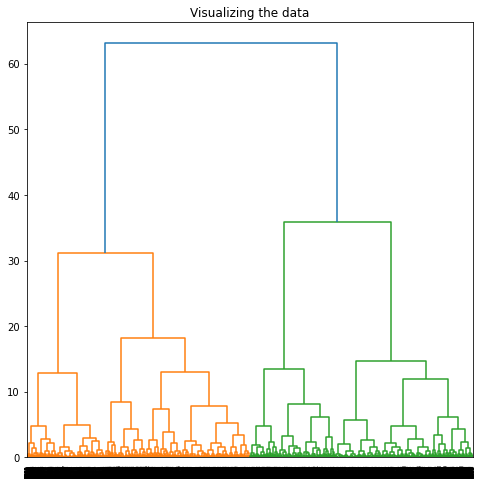

In [21]:
plt.figure(figsize=(8,8))
plt.title('Visualizing the data')
Dendogram=shc.dendrogram(shc.linkage(x_principal,method='ward'))

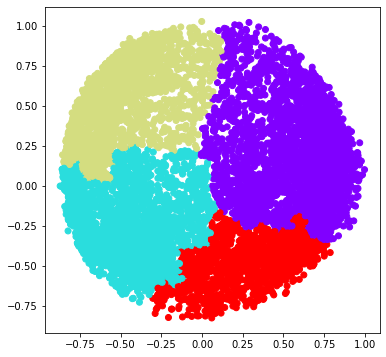

In [22]:
ac=AgglomerativeClustering(n_clusters=4)
plt.figure(figsize=(6,6))
plt.scatter(x_principal['P1'],x_principal['P2'],c=ac.fit_predict(x_principal),cmap='rainbow')
plt.show()